<img src="https://drive.google.com/uc?id=1-cL5eOpEsbuIEkvwW2KnpXC12-PAbamr" style="Width:1000px">

# Multiclass classification with satellite data 👩🏼‍🚀

The dataset you will be working with comes from the <a href='https://archive.ics.uci.edu/ml/datasets/Statlog+%28Landsat+Satellite%29'>UCI machine learning website</a>. It consists of the multi-spectral values of pixels in 3x3 neighbourhoods in a satellite image, and the classification associated with the central pixel in each neighbourhood. The aim is to predict this classification, given the multi-spectral values. In the sample database, the class of a pixel is coded as a number.

The Landsat satellite data is one of the many sources of information available for a scene. The interpretation of a scene by integrating spatial data of diverse types and resolutions including multispectral and radar data, maps indicating topography, land use etc. is extremely important. Classical statistical methods are ill-equipped for handling such diverse data types.

One frame of Landsat MSS imagery consists of four digital images of the same scene in different spectral bands. Two of these are in the visible region (corresponding approximately to green and red regions of the visible spectrum) and two are in the (near) infra-red. Each pixel is a 8-bit binary word, with 0 corresponding to black and 255 to white. The spatial resolution of a pixel is about 80m x 80m. Each image contains 2340 x 3380 such pixels.

The database is a (tiny) sub-area of a scene, consisting of 82 x 100 pixels. Each line of data corresponds to a 3x3 square neighbourhood of pixels completely contained within the 82x100 sub-area. Each line contains the pixel values in the four spectral bands (converted to ASCII) of each of the 9 pixels in the 3x3 neighbourhood and a number indicating the classification label of the central pixel. The number is a code for the following classes:

Number Class
* 1 red soil
* 2 cotton crop
* 3 grey soil
* 4 damp grey soil
* 5 soil with vegetation stubble
* 6 mixture class (all types present)
* 7 very damp grey soil

NB. There are no examples with class 6 in this dataset.

The data is given in random order and certain lines of data have been removed so you cannot reconstruct the original image from this dataset.

In each line of data the four spectral values for the top-left pixel are given first followed by the four spectral values for the top-middle pixel and then those for the top-right pixel, and so on with the pixels read out in sequence left-to-right and top-to-bottom. Thus, the four spectral values for the central pixel are given by attributes 17,18,19 and 20. If you like you can use only these four attributes, while ignoring the others. This avoids the problem which arises when a 3x3 neighbourhood straddles a boundary.


👇 Load the `sat.trn` dataset located within the data folder to see what you will be working with. Note that the dataset again does **NOT** have headers for the columns (you should know how to manage this by now). You will also quickly notice that opening this dataset 'as is' with pandas results in a single column dataframe: this is because the values are not comma separate (cvs) but instead are separated by a space (<code>' '</code>). Read the Pandas doc to see how you can open this file properly.<br><br>
Onced opened, call your new dataframe <code>data</code>. The data has no missing values and is already cleaned for you.

In [1]:
from nbta.utils import download_data
download_data(id='1YAsjIaBVOLVHdO4QKkzaiBLGxtHWabOe')

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('raw_data/sat.trn', sep = ' ', header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,grey soil
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,grey soil
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,grey soil
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,grey soil
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,grey soil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4430,56,64,108,96,64,71,108,96,68,75,...,92,66,83,108,96,66,87,104,89,soil with vegetation stubble
4431,64,71,108,96,68,75,108,96,71,87,...,96,66,87,104,89,63,87,104,89,soil with vegetation stubble
4432,68,75,108,96,71,87,108,88,71,91,...,89,63,87,104,89,70,100,104,85,damp grey soil
4433,71,87,108,88,71,91,100,81,76,95,...,89,70,100,104,85,70,91,104,85,damp grey soil


# Visualizing the data
The satellite data that we have consists of 4 channels (4 images) each of 3x3 pixels. So this is a tiny bit of satellite data per each image.<br>
Let's visualise the data for the first image in the dataset. I have already written the code for you. Read the code, make sure you understand it. If not, ask questions. Then run it to see what the data looks like.

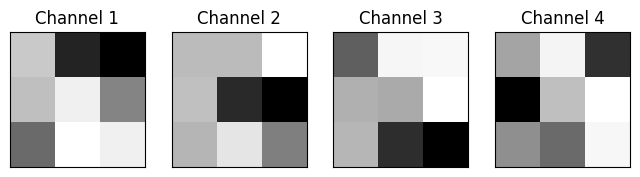

In [3]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,4,figsize=(8,32))
                         
sat_data = data.iloc[0,:].drop(36).astype('int')
channels = sat_data.values.reshape(4,9)
                         
for ax, channel, i in zip(axes, channels,[1,2,3,4]):
    ax.imshow(channel.reshape(3,3), cmap='Greys')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(f'Channel {i}')


### Color images

The dataset does not specify the meaning of each channel. But if we assume that the first three channels represent the RGB component of a color image, and the 4th one is the near-infrared spectrum, we can draw the same data in color plus one near-infrared image:

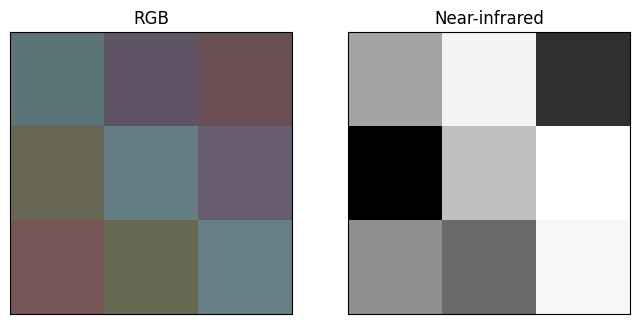

In [4]:

fig, axes = plt.subplots(1,2,figsize=(8,16))
titles = ['RGB', 'Near-infrared']
                         
sat_data = data.iloc[0,:].drop(36).astype('float')
channels = sat_data.values.reshape(4,9)

rgb = np.uint8(channels[0:3].reshape(3,3,3))
axes[0].imshow(rgb, alpha=1)
axes[1].imshow(channels[3].reshape(3,3), cmap='Greys')

for ax, title in zip(axes, titles):
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(title)

### More on images

Since we are on the topic of images, let's look at how they are represented. Run the code below:

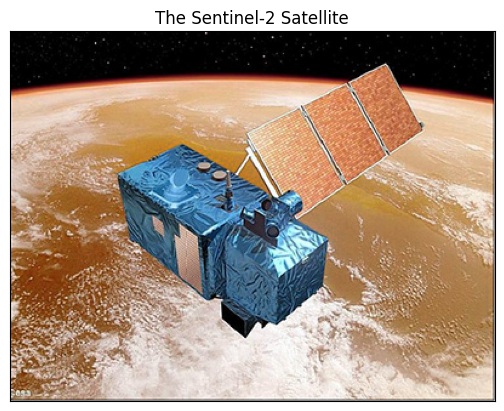

In [8]:
import cv2

img = cv2.imread('raw_data/Sentinel-2.jpeg')

ax = plt.subplot()
plt.imshow(img)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('The Sentinel-2 Satellite');

Now try the following code:

In [9]:
print(f'The type of this image object is: {type(img)}')
print(f'The shape of this image object is: {img.shape}')

The type of this image object is: <class 'numpy.ndarray'>
The shape of this image object is: (305, 400, 3)


🖼️ As you can see, an image is simply represented as an `np.array` of dimention `nb_pixels` x `nb_pixel` x `nb_channels` (3 for RGB)

# Preparing the target and splitting
The label column (<code>36</code>) is not encoded. Here, do the following:
* Encode the label column with your own encoder. Save the fitted encoder in a variable named <code>encoder</code> (you will need it later)
* create the features (<code>X</code>) and target (<code>y</code>) dataframes. 
* Normalize <code>X</code> by dividing it by the absolute maximum value of a pixel (read the text above to find out what this is). In cases where there is an absolute maximum value (such as here for pixel values) it is a good idea to normalise to it: this way, all data will always conform to your normalization. As an added bonus, because the minimum value for a pixel is zero, simply dividing by the maximum value results effectively in `MinMax` normalization
* Train/test split your data with a 30% test set size and using a random state of 42
* name your splits <code>X_train</code>, <code>X_test</code>, <code>y_train</code>,<code>y_test</code>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = data.drop(36, axis=1)/255
y = data[36]

encoder = LabelEncoder().fit(y)
y= encoder.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

# Dummy Model
As before, we need to first establish what our baseline model is. This time, we are dealine with a multiclass problem so reading our metrics will be slightly different. Below, do the following:
* Create and train a <code>DummyClassifier</code> on the train set. Read the doc about the 'strategy' parameter and find one that would give you a prediction that respects the class distribution. **Beware:** This object takes a `random_state` so set it to `42`!
* Use the following <code>sklearn</code> metrics: <code>precision_score</code>, <code>recall_score</code>, <code>accuracy_score</code>, <code>f1_score</code>
* Read the documentation on these metrics, in particular the 'average' parameter since we no longer are dealing with binary classifications. Experiment with a few of the possible values for 'average' to see what they do to the score.
* Save your metrics as variables named <code>dummy_precision</code>, <code>dummy_recall</code>, <code>dummy_accuracy</code>, <code>dummy_f1</code>
* Print all of your metric to the screen neatly so you can compare them later

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

dummy = DummyClassifier(strategy="stratified", random_state=42)
dummy.fit(X_train, y_train)

dummy_pred = dummy.predict(X_test)

dummy_precision = precision_score(y_test, dummy_pred, average=None)
dummy_recall = recall_score(y_test, dummy_pred, average=None)
dummy_accuracy = accuracy_score(y_test, dummy_pred)
dummy_f1 = f1_score(y_test, dummy_pred, average=None)

print(f'Precision: {dummy_precision}')
print(f'Accuracy: {dummy_accuracy}')
print(f'Recall: {dummy_recall}')
print(f'F1: {dummy_f1}')

☝🏻 Is precision, recall, and F1 the same for all of the classes?<br> 
Save the full name of the class that has the best scores under a string variable named <code>best_performer</code> (**hint**: you will need to use the <code>.inverse_transform</code> method of your target encoder). 

In [ ]:
best_performer = encoder.inverse_transform([4])[0]
best_performer

### ☑️ Check your code

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('dummy_model',
                         dataset = data,
                         score = dummy_accuracy,
                         performer = best_performer
)

result.write()
print(result.check())

# Confusion Matrix

Simply looking at the numerical values is not always the best / easiest way to do an error analysis. This is especially true for multilabels classification.

Because drawing a confusion matrix requires a few lines of codes, it makes a lot of sense to define a function (let's call it `make_confusion_matrix`) that takes the true labels (`y_true`) and the predicted labels from your model (`y_pred`) and returns a nicely drawn confusion matrix. This is what you will do now.

## Simple confusion matrix

Start with a simple confusion matrix looking like this one:<br>
![cfm_simple](raw_data/basic_matrix.png)

Note the following:
* You will need to use the `confusion_matrix` from `sklearn.metrics` to generate an array
* You then use the <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'> `heatmap()` method from the `seaborn` library </a>to draw the matrix
* To get the labels printed correctly [1] check the `LabelEncoder` documentation for a method returning the classes in the encoder, and [2] transform the confusion_matrix output into a `DataFrame` with appropriate column and index names
* There are several options you will need to tinker with in the `heatmap()` method to make your confusion matrix look like mine. Note that I used the 'coolwarm' color map, but feel free to use the one you prefer.
* The `x_axis` represents the  predicted labels, and the `y_axis` the true labels
* The numbers inside the confusion matrix are number of sample in each class. These come straight from the `confusion_matrix` method but will need to be formatted using parameters of the `heatmap()` method.

You will probably need some time to get your matrix looking nicely square, with the numbers inside (i.e. the number of instance belonging to each true/false positive/negative) the matrix, and the formatting looking good. Take the time to do this, because confusion matrix are an important part of a written report in data science, and so now is a good time to learn to make them. And because you are writing a function, you will reuse this code for the rest of the notebook. So don't rush it.


In [ ]:
# Finish the function below:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred):
    labels = encoder.classes_
    data = confusion_matrix(y_true,y_pred)
    data = pd.DataFrame(data, columns=labels, index=labels)
    sns.heatmap(data, cmap='coolwarm',
            annot=True, 
            fmt='d',
            square=True,
           cbar=False);


In [ ]:
# Then test your code with this line:
make_confusion_matrix(y_test, dummy_pred)

## *Optional*: improved confusion matrix

Of course, you can vastly improve on the basic design of your confusion matrix. For instance, you could make it look like this:<br><br>
![cfm_simple](raw_data/improved_matrix.png)

Here I added the following:
* Change the size of the confusion matrix using appropriate `matplotlib` objects (`seaborn` is built on top of `matplotlib`)
* In addition to the matrix, I plot the `X` and `Y` axis label, as well as a title
* I added a metric in the title: I chose the average F1 score, as it is a good one to compare different models
* I added a 45$^{\circ}$ tilt to the `x_axis` labels to make the text look nicer, I increased the font of the labels, making some bolds.
* In addition to the total number of samples, I added the percentage of each category (number of sample in each bin divided by total number of samples in a given category (i.e. total of 'true' labels for each category)

You can use your own imagination and sense of graphic design here to make your confusion matrix look good, and be informative. There is no 'canned' method to do this, you need to use some python code and depending on what you want modify the signature of the `make_confusion_matrix` function (in my case, I needed to pass the title of the plot as an additional argument).
<br>
I suggest you do this once you are done with the rest of the notebook: you can then easily redraw your confusion matrix with the newer code.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    f1 = f1_score(y_true, y_pred, average='macro')
    fig, ax = plt.subplots(figsize=(6,6))
    labels = encoder.classes_
    data = confusion_matrix(y_true,y_pred)
    
    total = data.sum()
    cfm_labels = []
    for row in data:
        total = row.sum()
        cfm_labels.append([f'{n}\n({n/total*100:1.1f}%)' for n in row])
    
    data = pd.DataFrame(data, columns=labels, index=labels)
    

    
    sns.heatmap(data, cmap='coolwarm',
            annot=cfm_labels, 
            fmt='',
            square=True,
           cbar=False,
                ax=ax);
    ax.set_xlabel('Predicted Labels', size=14, weight='bold')
    ax.set_ylabel('True Labels', size=14, weight='bold')
    ax.set_title(f'{title}\n F1 Score: {f1:1.2f}', size=18)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")


In [ ]:
make_confusion_matrix(y_test, dummy_pred, 'Dummy Model')

# Baseline Model
Best practice is always to start modellingheatmaping a simple approach. If you are interested, read this <a href=https://blog.insightdatascience.com/always-start-with-a-stupid-model-no-exceptions-3a22314b9aaa> Medium Digest article</a> on why this is a good idea and how to do a baseline model. Be mindful that a `Dummy Model` (simply a random guess) is not the same as a `Baseline Model` (i.e. a model that is simple but has a good chance of having predictive power). Linear models are a good way to start in most cases, and this dataset is no exception. For regression, you would start with linear regression, whereas classification can be modelled by logistic regression.<br>
You might wonder how we could use linear regression in multiclass classification. For this, we can use different approach. Two well possible approaches are to train binary classifiers using a One versus One (OvO) or One versus Rest (OvR) approach. In other words, train multiple binary classifiers! In OvO, you need to train $x*(x-1)$ classifiers ($x$ being the number of classes), whereas in OvR you need to train $x$ classifiers (one per class). Because OvR is much more efficient, it is more often used in than OvO.<br>
The <code>sklearn LogisticRegression</code> class can use OvR as well as multinomial cross-entropy for multiclass classification. Let's exepriment with both. First, train a model using the 'ovr' strategy and a max_iter of 5000. 👇

In [ ]:
from sklearn.linear_model import LogisticRegression

logit_ovr = LogisticRegression(max_iter=5000, multi_class='ovr')

logit_ovr.fit(X_train, y_train)

Now use the y_test to predict classes and calculate scores (stores them in variables called `precision_ovr`, `recall_ovr`, etc..). Print the scores and draw a confusion matrix for the test set. **Spend some time looking at your matrix** to understand which classes generate most errors.

In [ ]:
y_pred = logit_ovr.predict(X_test)

precision_ovr = precision_score(y_test, y_pred, average=None)
recall_ovr = recall_score(y_test, y_pred, average=None)
accuracy_ovr = accuracy_score(y_test, y_pred)
f1_ovr = f1_score(y_test, y_pred, average=None)

In [ ]:
print(precision_ovr)
print(recall_ovr)
print(accuracy_ovr)
print(f1_ovr)

In [ ]:
make_confusion_matrix(y_test, y_pred, 'Logit-OVR')

## Changing the multiclassification strategy
Now try to train the same approach as above, but use the `multinomial` approach instead (again, don't forget to draw your confusion matrix). 👇

In [ ]:
logit_multi = LogisticRegression(max_iter=5000, multi_class='multinomial')

logit_multi.fit(X_train, y_train)

y_pred = logit_multi.predict(X_test)

precision_multi = precision_score(y_test, y_pred, average=None)
recall_multi = recall_score(y_test, y_pred, average=None)
accuracy_multi = accuracy_score(y_test, y_pred)
f1_multi = f1_score(y_test, y_pred, average=None)

print(precision_multi)
print(recall_multi)
print(accuracy_multi)
print(f1_multi)

In [ ]:
make_confusion_matrix(y_test, y_pred, 'Logit-Multi')

🙀 Are the scores the same? What if you average each metrics, and substract on result from the other? Which approach, on average, works better? Save your answer (`ovr` or `multinomial`) in a string called `best_approach`.

In [ ]:
print(np.mean(precision_ovr-precision_multi))
print(np.mean(recall_ovr-recall_multi))
print(np.mean(accuracy_ovr-accuracy_multi))
print(np.mean(f1_ovr-f1_multi))

In [ ]:
best_approach='multinomial'

### ☑️ Check your code

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('linear_model',
                         dataset = data,
                         approach = best_approach,
                         accuracy = accuracy_ovr
)

result.write()
print(result.check())

# 🏘️ K-Nearest Neighbors Models
You have two important things by running the models above:
1. The logistic regression model has a much greater prediction power than a dummy model: this is good! In fact, the results are quite decent, even if some classes perform more poorly than others.
2. However, changing your approach to multiclass classification changes your results: precision is overall greater with `ovr` but all of the other metrics are better with `multinomial`, especially the `f1` score
<br>

This sort of paramter is called a 'hyperparamters' because it is selected before you train your network, but it impact the final result. Choosing the best parameter for your task is called 'hyperparameter tuning'. We will explore this topic in our 4th lecture.
One fundamental hyperparameter is the choice of our model, of course. `LogisticRegression` did well here, but now try to see if a `KNeighborsClassifier` could outperform your initial base model. Use the numerical metrics, but also do an error analysis using your confusion metrics. Are the classes that were poorly classify with `Logistic Regression` better classified now?👇

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

y_pred = model.predict(X_test)

precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average=None)

In [ ]:
print(np.mean(precision-precision_multi))
print(np.mean(recall-recall_multi))
print(np.mean(accuracy-accuracy_multi))
print(np.mean(f1-f1_multi))

❓So did the `RandomForest` classifier outperform LogisticRegression? Calculate the mean difference in F1 score between your LogisticRegression model with the highest F1 score, and the `RandomForest` results. Store the value in a variable called `f1_difference`. 👇

In [ ]:
make_confusion_matrix(y_test, y_pred, 'KNeighborsClassifier')

In [ ]:
f1_difference = np.mean(f1 - f1_multi)
f1_difference

### ☑️ Check your code

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('f1_diff',
                         dataset = data,
                         score = f1_difference
)

result.write()
print(result.check())

## 🔬 Observations

It should be clear to you by now looking at the various confusion matrices that the largest source of model error are the *damp grey soil* class being misclassified as either *grey soil* or *very damp grey soil*. Intuitively, this is logical: these classes are very similar, and the model might not have enough features to properly separate them on the fragments of satellite images we used. Linear model are clearly outperformed by the KNN algorithm: just about 30% of *damp grey soils* are misclassified by the KNN approach, whereas logistic regression has a misclassification rate of above 90% for this category.


# 💸 Deploying your algorithm

Let's simulate the real world now. You are a data scientist, and you figured out above that your best approach is to use random forest. Here are your next steps:

* Remember this train/test split you did at the begining of the notebook? This was crucial to train a model and be able to evaluate how well it generalised to unseen data (the test set). Without doing this, there was no way to properly assess your model. But once you have done your work and selected the best model, the next step is to retrain your selected model **with all of the available data**. This means you need now to train the same `KNeighborsClassifier()` with the same hyperparamters but with the entire `X` and `y` dataset.
* Of course, you won't be able to test this model anymore but at that point you are deploying your model, so training it on the entire dataset!
* The you can predict unknown samples, i.e. samples with `X` (features) but no known `y`.

Let's do this. First, retrain your KNN algorithm (call this `final_model`) with all of your available labelled data.

In [ ]:
final_model = KNeighborsClassifier().fit(X,y)

## 🎛️ Predicting 'in production'

Now that we have our final, production model ready, we can predict unknown data!
* Open the file `'raw_data/test.dat'`
* Prepare the data the same way you prepared your training dataset earlier. Remember: you do not have a target so no need to prepare the `y` variable
* Use your `final_model` to predict the classes of the 2000 new samples you just opened. Store the results in a variable named `predictions`

In [ ]:
test_data = pd.read_csv('raw_data/test.dat', sep = ' ', header=None)
test_data = test_data / 255
test_data

In [ ]:
predictions = final_model.predict(test_data)

## 🤞 Checking your predictions

So how well did your model perform? Well, in the real world, you would not know of course, unless you gathered more labelled data. This is why ensuring your algorithm generalizes well is so important.

In this case, I do know the label of your 'production' data: if you run and pass the test below, you know you did well! ㊗️

*P.S. If you don't pass the test below, make sure that you have saved your fitted encoder in a variable named `encoder` and your predictions in a variable named `predictions`. If you still don't pass, call a TA for help.*

### ☑️ Check your code

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('final_results',
                         encoder = encoder,
                         predictions=predictions,
                         data=pd.read_csv('tests/test_data.csv', header=None)
)

result.write()
print(result.check())

# 🏁 Finished!

Well done! <span style="color:teal">**Push your exercise to GitHub**</span>, and move on to the next one.